# Example Growth Charts

Work to show the possible examples.

In [1]:
from __future__ import print_function

In [ ]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [246]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import time

import matplotlib as mpl

import datetime



from sklearn import linear_model


import random

In [3]:

f = open('data/gamelogs.dat')



zero_day = 75
max_day = 300


DDStats = {}

for line in f:
    q = [d.strip(" ") for d in line.split(';')]
    
    if q[0] not in DDStats.keys():
        DDStats[q[0]] = {}
        
    if q[1] not in DDStats[q[0]].keys():
        
        if q[0] in ['OPP','POS','TEAM']:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day,dtype='S5')
            
        else:
            DDStats[q[0]][q[1]] = np.zeros(max_day-zero_day)
        
    for indx in range(0,len(q)-3):
        #print(q[0],q[1],q[indx+2])
        
        if q[0] in ['OPP','POS','TEAM']:
            DDStats[q[0]][q[1]][indx] = q[indx+2]

        else:
            try:
                DDStats[q[0]][q[1]][indx] = float(q[indx+2])
            except:
                DDStats[q[0]][q[1]][indx] = 0.
    


f.close()


print(DDStats.keys())

['OPP', 'BB', 'HR', 'H', 'BO', 'POS', 'PA', 'SO', 'RBI', 'TEAM', 'SB', 'R']


In [4]:

#
# read in team schedule data
#
f = open('data/teamgames.dat','r')

GGDict = {}
for line in f:
    q = [d for d in line.split()]
    GGDict[q[0]] = np.array(q[1:]).astype('int')
    
f.close()


#
# and helper items for translating
#


team_translate = {'angels':'LAA','astros':'HOU','athletics':'OAK',\
                  'bluejays':'TOR','braves':'ATL','brewers':'MIL',\
                  'cardinals':'STL','cubs':'CHC','diamondbacks':'ARI',\
                  'dodgers':'LAD','giants':'SFG','indians':'CLE',\
                  'mariners':'SEA','marlins':'MIA','mets':'NYM',\
                  'nationals':'WSN','orioles':'BAL','padres':'SDP',\
                  'phillies':'PHI','pirates':'PIT','rangers':'TEX',\
                  'rays':'TBR','reds':'CIN','redsox':'BOS',\
                  'rockies':'COL','royals':'KCR','tigers':'DET',\
                  'twins':'MIN','whitesox':'CHW','yankees':'NYY'}


def translate_team(team_translate,inteam):
    '''
    translate between shorthand and longhand fangraphs team names
    
    '''
    
    try:
    
        return np.array(team_translate.keys())[np.where(inteam==np.array(team_translate.values()))[0]][0]

    except:
        
        return ''

    
def generate_schedule(GGDict,team,min_day=75,max_day=300):
    '''
    for a given team, return an array of which calendar days the team played on
    
    
    '''
    
    schedule = []
    
    for i in range(min_day,max_day):
        
        if i in GGDict[team]:
            schedule.append(team)
            
        else:
            schedule.append('')

    return np.array(schedule)







In [302]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300

GStats = {}

# loop for each stat
for key1 in np.array(DDStats.keys()):
    print(key1)
    
    GStats[key1] = {}
    
    # loop for each player
    for key2 in np.array(DDStats[key1].keys()):
        
        # initialize arrays (strings for team names and positions)
        if key1 in ['OPP','POS','TEAM']:
            GStats[key1][key2] = np.zeros(max_day-zero_day,dtype='S5')
            
        # zeros for everything else
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day)# + np.nan
            
        # step through each calendar day
        gnum = 0 # log of each game number
        for indx,val in enumerate(DDStats[key1][key2]):
            
            # in this loop, indx is the number of days from march 16th
                        
            # step 1: did the player have plate appearances on a given day?
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            # step 2: were they on the DL?
            
            #
            # here is where the boolean mask gets plugged in
            #
                
            # step 3: if neither of above, did their team play?
            else:
                # identify which team player is on (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '')  & (indx+indx1+1 < len(DDStats['TEAM'][key2])):

                    indx1 += 1

                # once out of loop, identify which team
                which_team = DDStats['TEAM'][key2][indx+indx1]
                
                # check if team had a game: if yes, advance one day
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStats[key1][key2][gnum] = 0.#GStats[key1][key2][gnum-1]
                        gnum += 1
                




OPP
BB
HR
H
BO
POS
PA
SO
RBI
TEAM
SB
R


In [315]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300

GStatsD = {}

# loop for each stat
for key1 in np.array(DDStats.keys()):
    
    print(key1)
    
    GStatsD[key1] = {}
    
    # loop for each player
    for key2 in np.array(DDStats[key1].keys()):
        
        # initialize arrays (strings for team names and positions)
        if key1 in ['OPP','POS','TEAM']:
            GStatsD[key1][key2] = np.zeros(max_day-zero_day,dtype='S5')
            
        # zeros for everything else
        else:
            GStatsD[key1][key2] = np.zeros(max_day-zero_day)# + np.nan
            
        # step through each calendar day
        gnum = 0 # log of each game number
        
        # this now places a cap of day 184, July 4
        for indx,val in enumerate(DDStats[key1][key2][0:(184-zero_day)]):
            
            # in this loop, indx is the number of days from march 16th
                        
            # step 1: did the player have plate appearances on a given day?
            if DDStats['POS'][key2][indx] != '':
                GStatsD[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            # step 2: were they on the DL?
            
            #
            # here is where the boolean mask gets plugged in
            #
                
            # step 3: if neither of above, did their team play?
            else:
                # identify which team player is on (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '')  & (indx+indx1+1 < len(DDStats['TEAM'][key2])):

                    indx1 += 1

                # once out of loop, identify which team
                which_team = DDStats['TEAM'][key2][indx+indx1]
                
                # check if team had a game: if yes, advance one day
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStatsD[key1][key2][gnum] = 0.#GStats[key1][key2][gnum-1]
                        gnum += 1
                





OPP
BB
HR
H
BO
POS
PA
SO
RBI
TEAM
SB
R


In [103]:
stat = 'R'
pname = 'Adam Jones'

des_pos_list = ['C','1B','2B','3B','SS','LF','CF','RF']
des_pos = 'CF'

for indxp,des_pos in enumerate(des_pos_list):
    plist1 = []
    plist2 = []
    for indx,plr in enumerate(DDStats['POS'].keys()):
        if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
            plist1.append(plr)
        if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 161:
            #print(plr)
            plist2.append(plr)
        
    print('{0:4s}{1:4d}{2:4d}'.format(des_pos,len(plist1),len(plist2)))
        


C     59   0
1B    35   1
2B    40   0
3B    39   0
SS    42   0
LF    38   0
CF    39   0
RF    35   0


In [316]:
print(GStatsD['PA']['Tommy Pham'])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  5.  4.  6.  5.  4.  5.  4.  4.  4.  4.
  6.  4.  1.  4.  1.  0.  4.  3.  5.  5.  4.  4.  3.  4.  0.  4.  4.  4.
  4.  4.  3.  4.  4.  4.  9.  1.  1.  5.  5.  4.  5.  5.  4.  5.  4.  5.
  5.  5.  4.  1.  5.  4.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [85]:

from sklearn.metrics import mean_absolute_error


def fit_porcupine(GStats,stat,pname,window_size=7,resolution=7,extension=7):
    '''
    fit_porcupine
        make a linear regression fit to the data at discrete points
    
    '''
    regr = linear_model.LinearRegression()
    
    mod_x = {}
    mod_points = {}
    mod_stats = {}

    for day in range(0, 162, resolution):
        start_day = day
        stop_day = day+window_size + 1
        x = np.arange(1.,len(GStats[stat][pname])+1,1.)
        y = np.cumsum(GStats[stat][pname])

        regr = linear_model.LinearRegression()

        sub_x = x[start_day:stop_day]
        sub_y = y[start_day:stop_day]
        sub_x = sub_x.reshape(start_day-stop_day+1,1)
        sub_y = sub_y.reshape(start_day-stop_day+1,1)

        regr.fit(sub_x, sub_y)

        new_x = (x[start_day:stop_day+extension]).reshape(start_day-stop_day+1,1)
        mod_x[day] = new_x
        mod_points[day] = regr.predict(new_x)
        mod_stats[day] = {}
        mod_stats[day]['slope'] = regr.coef_[0][0]
        mod_stats[day]['intercept'] = regr.intercept_[0]
        mod_stats[day]['mae'] = mean_absolute_error(sub_y, regr.predict(sub_x))
        mod_stats[day]['r2'] = regr.score(sub_x,sub_y)
        
        
    #slope = regr.coef_[0][0], 
    #"Intersect": regr.intercept_[0], 
    #"MAE": mean_absolute_error(y, regr.predict(x)),
    #"R^2" :regr.score(x, y)}

    return mod_x,mod_points,mod_stats
    
    
    


def make_realization(mod_x,mod_points,nreal=100):
    nkeys = len(np.array(mod_x.keys()))

    keyres = (np.max(np.array(mod_x.keys())) - np.min(np.array(mod_x.keys())))/nkeys + 1

    mod_x2 = np.arange(0,np.max(np.array(mod_x.keys()))+1,keyres)

    nreal = 200    

    mod_x2 = np.arange(0,np.max(np.array(mod_x.keys()))+keyres+1,keyres)

    mod_points2 = np.zeros([nreal,len(mod_x2)])

    for iteration in range(0,nreal):

        for keystep in range(1,nkeys+1):
            #print(keystep)

            randval = random.choice(mod_points.keys())
            
            #print(np.max(mod_points[randval])-np.min(mod_points[randval]))


            mod_points2[iteration,keystep] = np.max(mod_points[randval])-np.min(mod_points[randval])

    return mod_x2,mod_points2
            



In [281]:
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    #if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
    if len(np.where(GStats['PA'][plr] > 0)[0]) > 40:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))


stat = 'R'

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])





GStats2 = {}
GStats2[stat] = {}
GStats2[stat]['all'] = np.nanpercentile(PAlist,75,axis=0)


print(GStats2[stat]['all'])

mod_x,mod_points,mod_stats = fit_porcupine(GStats2,stat,'all',window_size=160,resolution=160,extension=0)


print(mod_stats)

418
[  0.     1.     1.     2.     2.     3.     3.     4.     4.     5.     5.
   5.     6.     6.     6.     7.     7.     8.     8.     9.     9.    10.
  10.    11.    11.    12.    12.    13.    13.    13.    14.    14.    15.
  15.    16.    16.    17.    17.    18.    18.    19.    19.    20.    21.
  21.    21.    22.    22.    22.    23.    23.    24.    24.    25.    25.75
  26.    26.    26.75  27.    27.    28.    28.    28.    29.    29.75  30.
  31.    31.75  32.    32.    33.    33.    34.    34.75  35.    35.    35.
  36.    36.    36.    37.    37.    37.    38.    38.    39.    39.75  40.
  40.    40.75  41.    41.    41.75  42.    42.    43.    43.    44.    44.
  45.    45.    46.    46.    46.    47.    47.    48.75  49.    49.    50.
  50.    51.    51.75  52.    52.    52.    52.75  53.    53.    54.    54.
  54.75  55.    56.    56.    56.    57.    57.    58.    58.75  59.75  60.
  60.    60.    61.    61.    62.    62.75  63.    63.    64.    64.    64.75
  65

### Open Questions

1. How to treat DL?
2. How to treat off days?

### Desired Functionality

1. By batting order
2. By position
3. By age
4. By opponent?

In [ ]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),max_day-zero_day])


stat = 'RBI'
print(len(np.array(DDStats[stat].keys())) )

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(DDStats[stat]['Whit Merrifield']),color='black')

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





In [ ]:
stat = 'PA'
pname = 'Byron Buxton'
des_pos = 'CF'
plist = []

for indx,plr in enumerate(DDStats['PA'].keys()):
    if len(np.where(GStats['PA'][plr] > 0)[0]) > 80:
        plist.append(plr)
        

print(len(plist))

418


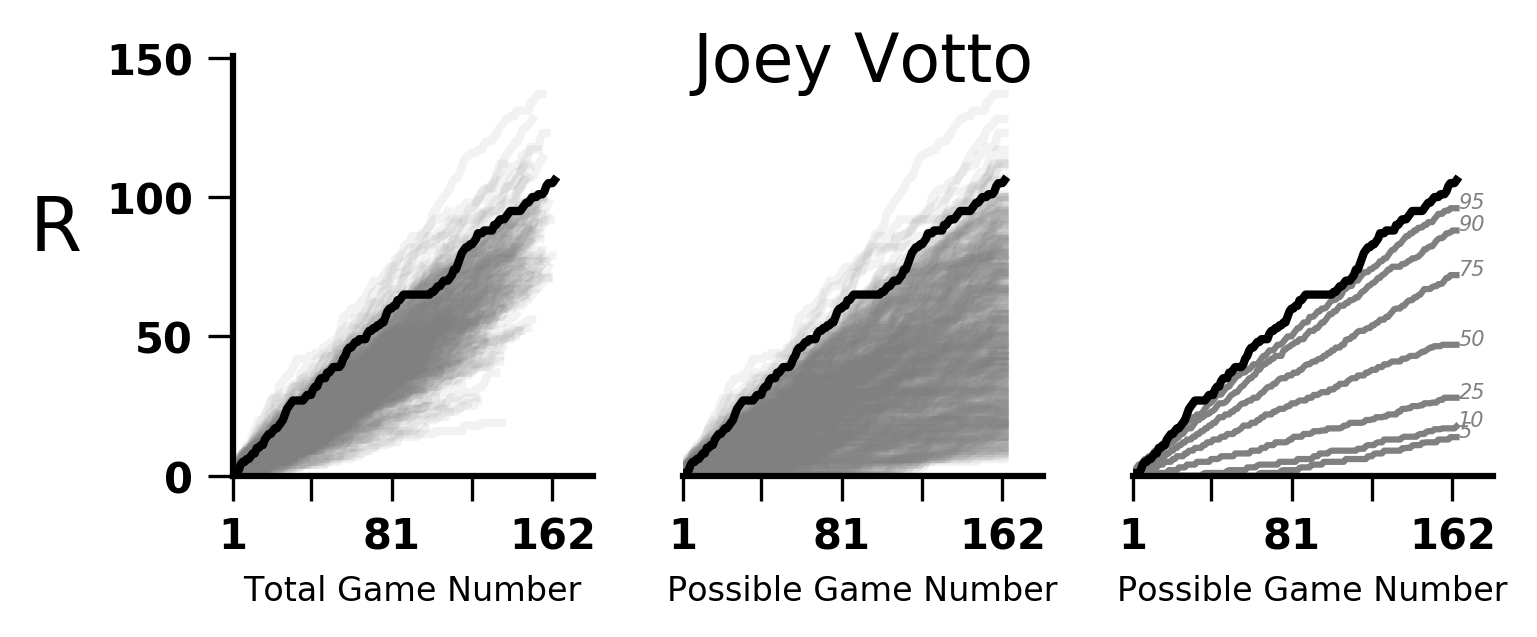

In [188]:


stat = 'R'
pname = 'Joey Votto'
des_pos = '1B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    #if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
    if len(np.where(GStats['PA'][plr] > 0)[0]) > 40:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))


#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(6,2),frameon = False)
ax2 = fig.add_axes([0.20,0.22,0.2,0.7])
ax = fig.add_axes([0.45,0.22,0.2,0.7])
ax3 = fig.add_axes([0.7,0.22,0.2,0.7])


maxval = 0.0
for indx,player in enumerate(np.array(plist)):
    
    nonz = np.where(GStats['PA'][player] > -1.)[0]

    ax.plot(np.arange(0,len(nonz),1)[0:162],np.cumsum(GStats[stat][player][nonz])[0:162],color='gray',alpha=0.1)
    
    maxval = np.max([maxval,np.max(np.cumsum(GStats[stat][player][nonz]))])
    
#ax.set_ylabel(stat,size=18,rotation=0, labelpad=12)

nonz = np.where(GStats['PA'][player] > -1.)[0]
ax.plot(np.arange(0,len(nonz),1)[0:162],np.cumsum(GStats[stat][pname][nonz])[0:162],color='black')

ax.set_xticks([1,40,80,120,160])
ax.set_xticklabels(['1','','81','','162'])


ax.set_xlabel('Possible Game Number',size=8)
ax.set_title(pname,size=16, y=.88)

_ = ax.axis([1,180,0,1.1*maxval])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)
ax.set_yticks(())



maxval = 0.0
for indx,player in enumerate(np.array(plist)):
    
    nonz = np.where(GStats['PA'][player] > 0.)[0]

    ax2.plot(np.arange(0,len(nonz),1),np.cumsum(GStats[stat][player][nonz]),color='gray',alpha=0.1)
    
    maxval = np.max([maxval,np.max(np.cumsum(GStats[stat][player][nonz]))])
    
ax2.set_ylabel(stat,size=18,rotation=0, labelpad=12)

nonz = np.where(GStats['PA'][pname] > 0.)[0]
ax2.plot(np.arange(0,len(nonz),1),np.cumsum(GStats[stat][pname][nonz]),color='black')

ax2.set_xticks([1,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])



ax2.set_xlabel('Total Game Number',size=8)
#ax2.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax2.axis([1,180,0,1.1*maxval])
    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)



#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


#for perc in range(100,0,-10):
for perc in [95,90,75,50,25,10,5]:


    ax3.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax3.text(163,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax3.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')


ax3.set_xticks([1,40,80,120,160])
ax3.set_xticklabels(['1','','81','','162'])

ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax3.axis([1,180,0,1.1*maxval])
    
    
ax3.set_yticks(())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_linewidth(1.5)

'''
mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        ax.plot(mod_x[key],mod_points[key],color='red',lw=1.)


        
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [33.,66.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)
'''
  

plt.savefig('/Users/mpetersen/Desktop/total_CF_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))



39
35
38


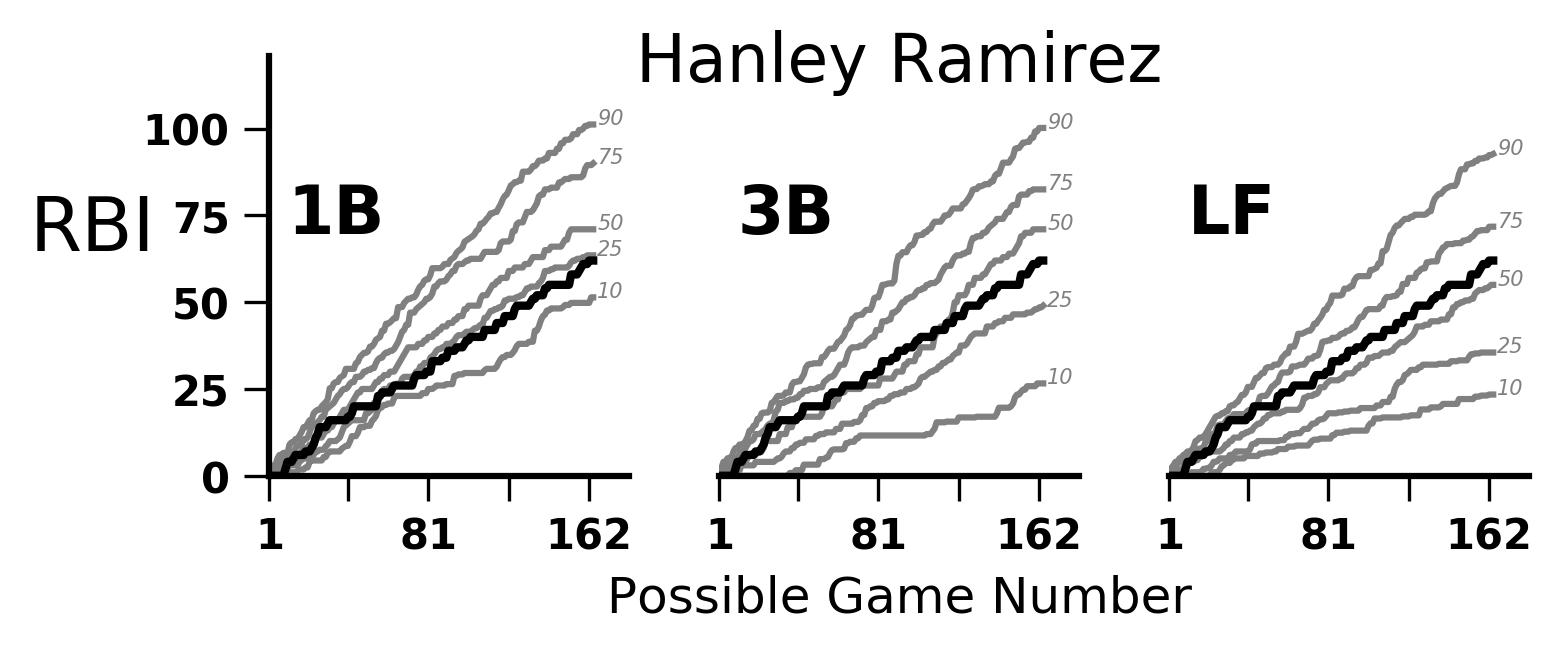

In [286]:



#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(6,2),frameon = False)
ax2 = fig.add_axes([0.20,0.22,0.2,0.7])
ax = fig.add_axes([0.45,0.22,0.2,0.7])
ax3 = fig.add_axes([0.7,0.22,0.2,0.7])

maxval = 110.

stat = 'RBI'
pname = 'Hanley Ramirez'
des_pos = '3B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))



#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

ax.text(10.,70.,des_pos,size=16)

ax.set_xticks([1,40,80,120,160])
ax.set_xticklabels(['1','','81','','162'])


ax.set_xlabel('Possible Game Number',size=12)
ax.set_title(pname,size=16,y=0.88)

_ = ax.axis([1,180,0,1.1*maxval])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_yticks(())

des_pos = '1B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))



#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax2.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax2.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax2.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')



ax2.set_xticks([1,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])

ax2.text(10.,70.,des_pos,size=16)
ax2.set_ylabel(stat,size=18,rotation=0, labelpad=12)




#ax2.set_xlabel('Possible Game Number',size=12)
#ax2.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax2.axis([1,180,0,1.1*maxval])
    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

pname = 'Hanley Ramirez'
des_pos = 'LF'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))




#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax3.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax3.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax3.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

ax3.text(10.,70.,des_pos,size=16)



ax3.set_xticks([1,40,80,120,160])
ax3.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax3.axis([1,180,0,1.1*maxval])
    
    
ax3.set_yticks(())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_linewidth(1.5)




plt.savefig('/Users/mpetersen/Desktop/total_CF_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))




39
0.540438808374
1.0
0.8
0.3
0.6
0.2
0.6
0.3
0.2
0.4
0.8
0.2
0.8
0.5
0.0
0.9
0.3
0.5
0.0
0.3
1.2
0.4
0.5
0.0
0.5
0.2
0.6
0.7
1.7
0.8
0.2
0.3
0.3
1.3
0.8
0.3
0.6
0.3
0.6


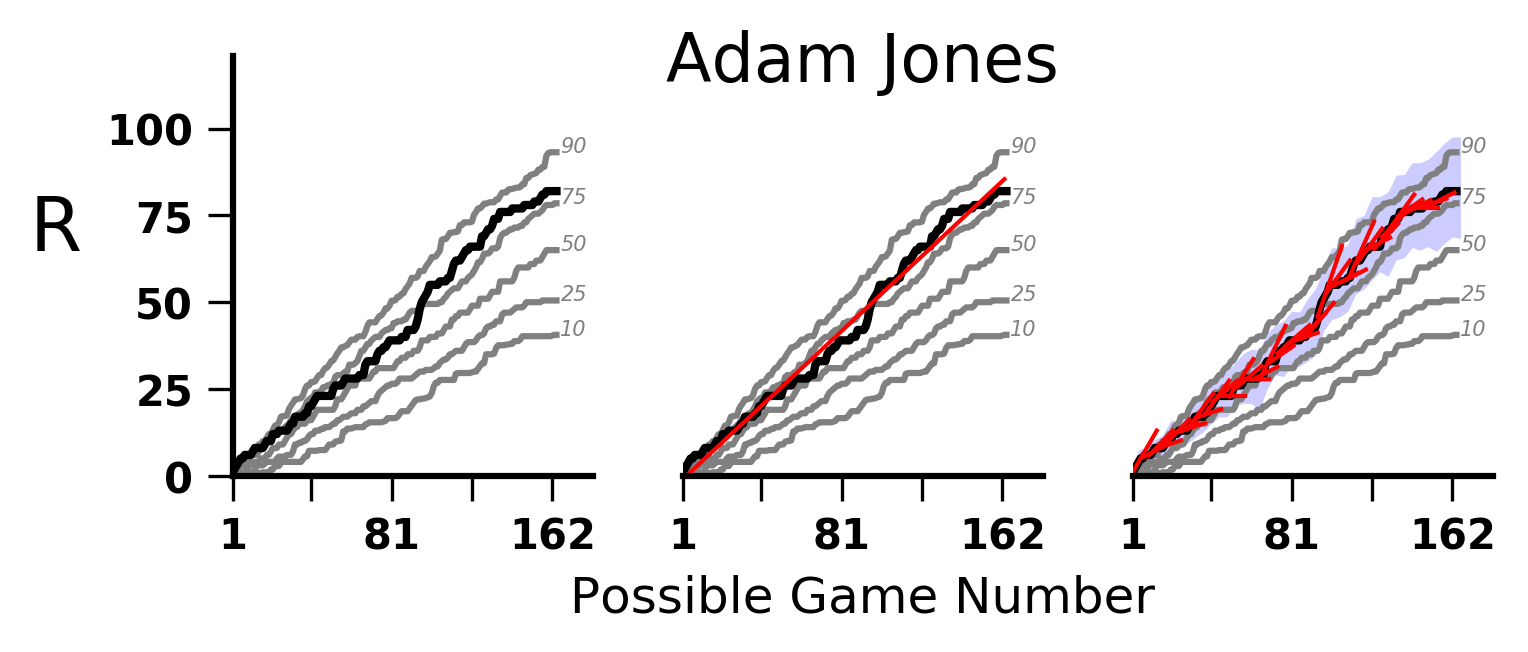

In [285]:



#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(6,2),frameon = False)
ax2 = fig.add_axes([0.20,0.22,0.2,0.7])
ax = fig.add_axes([0.45,0.22,0.2,0.7])
ax3 = fig.add_axes([0.7,0.22,0.2,0.7])

maxval = 110.

stat = 'R'
pname = 'Adam Jones'
des_pos = 'CF'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))



#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

  
    
ax.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')




mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat,pname,window_size=160,resolution=160,extension=0)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        print(mod_stats[key]['slope'])
        ax.plot(mod_x[key],mod_points[key],color='red',lw=1.)








ax.set_xticks([1,40,80,120,160])
ax.set_xticklabels(['1','','81','','162'])


ax.set_xlabel('Possible Game Number',size=12)
ax.set_title(pname,size=16,y=0.88)

_ = ax.axis([1,180,0,1.1*maxval])
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(1.5)

ax.set_yticks(())


#
# first fit line
# 
#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax2.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax2.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax2.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')



ax2.set_xticks([1,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])

ax2.set_ylabel(stat,size=18,rotation=0, labelpad=12)




#ax2.set_xlabel('Possible Game Number',size=12)
#ax2.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax2.axis([1,180,0,1.1*maxval])
    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax3.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax3.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax3.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')





mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        print(mod_stats[key]['slope'])
        ax3.plot(mod_x[key],mod_points[key],color='red',lw=1.)



mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [33.,66.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax3.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)



ax3.set_xticks([1,40,80,120,160])
ax3.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax3.axis([1,180,0,1.1*maxval])
    
    
ax3.set_yticks(())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_linewidth(1.5)




plt.savefig('/Users/mpetersen/Desktop/total_CF_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))





H RF
H CF
H LF
H SS
H 3B
H 2B
H 1B
H C
R RF
R CF
R LF
R SS
R 3B
R 2B
R 1B
R C
RBI RF
RBI CF
RBI LF
RBI SS
RBI 3B
RBI 2B
RBI 1B
RBI C
HR RF
HR CF
HR LF
HR SS
HR 3B
HR 2B
HR 1B
HR C
BB RF
BB CF
BB LF
BB SS
BB 3B
BB 2B
BB 1B
BB C
SO RF
SO CF
SO LF
SO SS
SO 3B
SO 2B
SO 1B
SO C


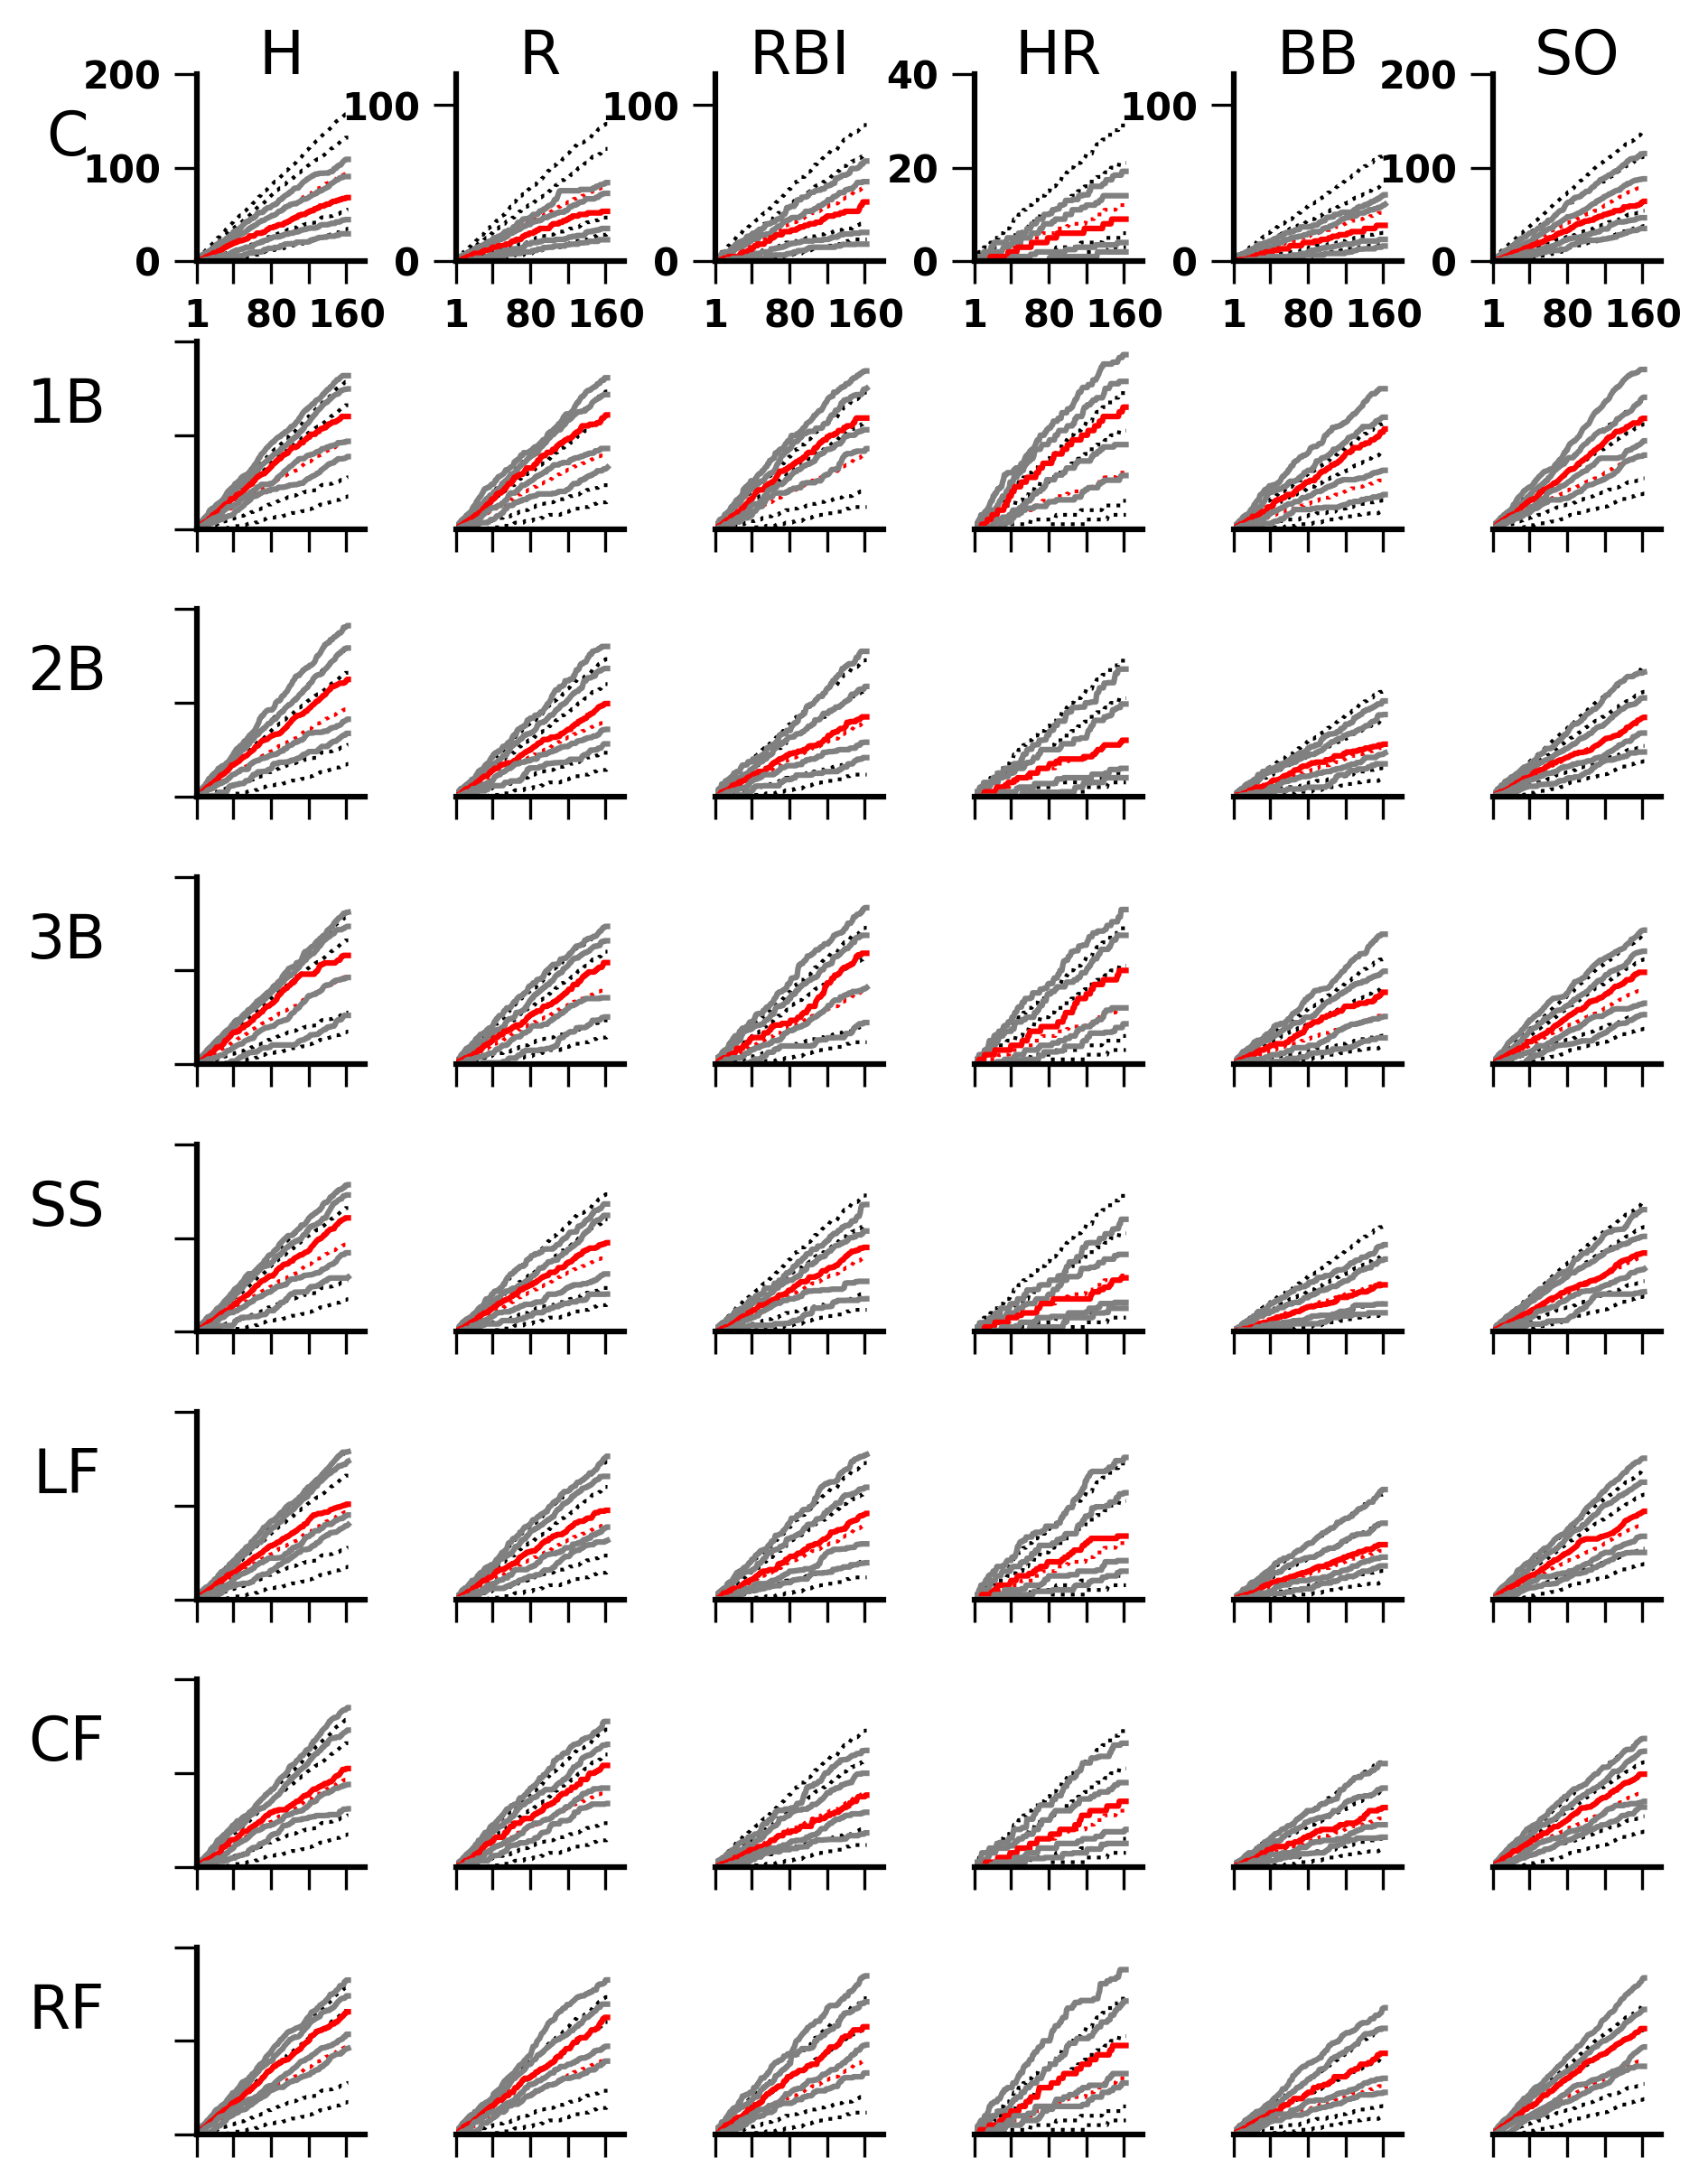

In [288]:


#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(7,10),frameon = False)

left_edge = 0.15
right_edge = 0.97
xdim = 6.
dx = (right_edge - left_edge)/xdim

bottom_edge = 0.15
top_edge = 0.94
ydim = 8.
dy = (top_edge - bottom_edge)/ydim

xpad = 0.65
ypad = 0.7

statlist = ['H','R','RBI','HR','BB','SO']
max_stat_val = [200.,120.,120.,40.,120.,200.]
pos_list = ['C','1B','2B','3B','SS','LF','CF','RF']
pos_list = pos_list[::-1]

plisttot = []
for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['PA'][plr] > 0.)[0]) > 40:
        plisttot.append(plr)
        



for xpos in range(0,int(xdim)):
    
    for ypos in range(0,int(ydim)):
        
        
        ax = fig.add_axes([xpos*dx + left_edge,\
                           ypos*dy + bottom_edge,\
                           dx*xpad,dy*ypad])

        stat = statlist[xpos]
        des_pos = pos_list[ypos]
        
        print(stat,des_pos)
        plist = []

        for indx,plr in enumerate(DDStats['POS'].keys()):
            if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 40:
                plist.append(plr)
        

        PAlist = np.zeros([len(plist),max_day-zero_day])    

        for indx,player in enumerate(np.array(plist)):
    
            PAlist[indx] = np.cumsum(GStats[stat][player])

        # make the entire distribution
        PAlistT = np.zeros([len(plisttot),max_day-zero_day])

        for indx,player in enumerate(np.array(plisttot)):
    
            PAlistT[indx] = np.cumsum(GStats[stat][player])    

        #for perc in range(100,0,-10):
        for perc in [90,75,50,25,10]:

            if perc == 50:
                ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='red',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
                ax.plot(np.arange(1,len(GStats[stat][np.array(plisttot)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlistT,perc,axis=0)[0:162],color='red',lw=1.0,linestyle='dotted',zorder=-9)#cm.gnuplot(float(perc/100.),1.))
        
            else:
                ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
                ax.plot(np.arange(1,len(GStats[stat][np.array(plisttot)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlistT,perc,axis=0)[0:162],color='black',lw=1.0,linestyle='dotted',zorder=-9)#cm.gnuplot(float(perc/100.),1.))
    


    
        #ax.text(10.,70.,des_pos,size=16)

        ax.set_xticks([1,40,80,120,160])
        
        if (ypos == 7):
            ax.set_xticklabels(['1','','80','','160'])

        else:
            ax.set_xticklabels(['','','','',''])

        #ax.set_xlabel('Possible Game Number',size=12)
        
        if ypos == 7:
            ax.set_title(stat,size=16,y=0.88)

        _ = ax.axis([1,180,0,max_stat_val[xpos]])
    
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(1.5)
        
        if (xpos == 0) | (ypos == 7):
            
            ax.spines['left'].set_linewidth(1.5)
            
        else:
            ax.spines['left'].set_visible(False)
            ax.set_yticks(())
            
            
        if (xpos == 0) & (ypos == 7):
            ax.set_ylabel(des_pos,size=16,rotation=0)
             
            
        if (xpos == 0) & (ypos < 7):
            
            ax.spines['left'].set_linewidth(1.5)
            ax.set_yticklabels(())
            ax.set_ylabel(des_pos,size=16,rotation=0,labelpad=25)


plt.savefig('/Users/mpetersen/Desktop/appendixfig2.png')

36
0.551276742581
36
0.128177478721


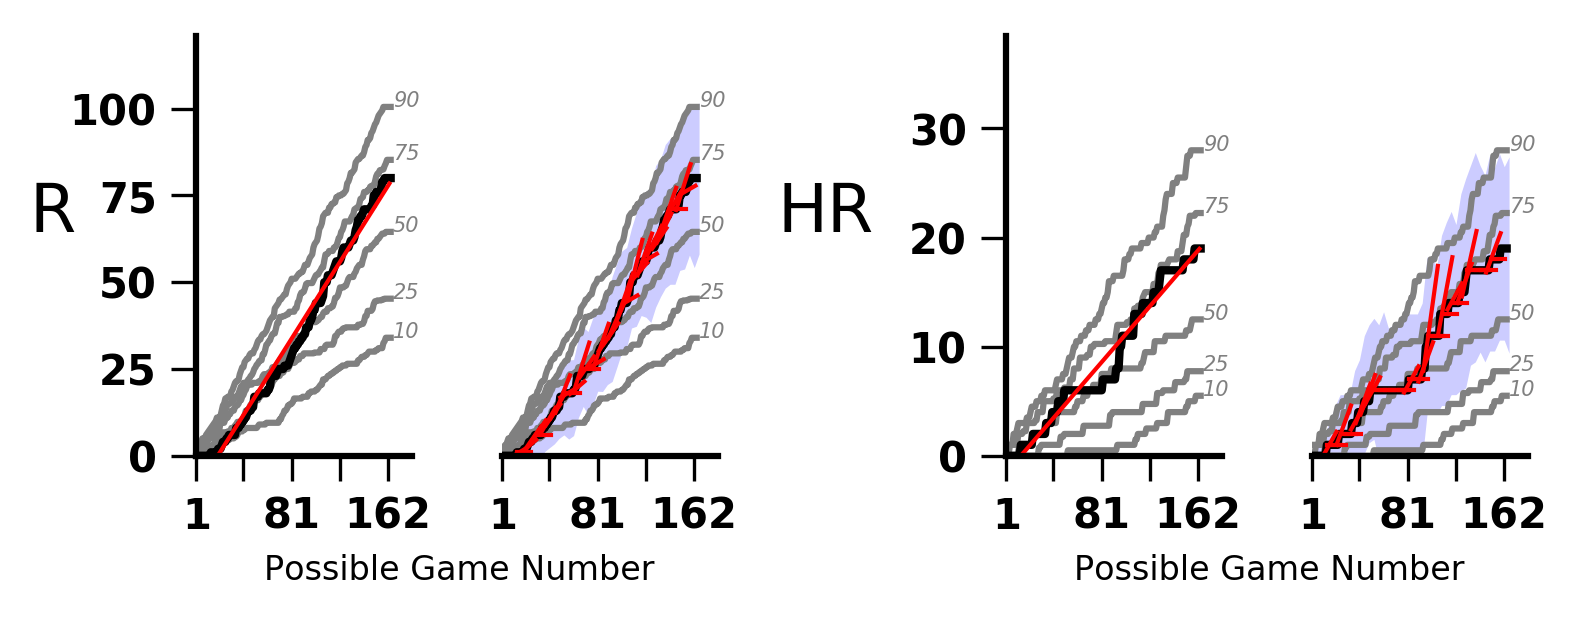

In [247]:

stat = 'R'
stat2 = 'HR'
pname = 'Whit Merrifield'
des_pos = '2B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])






#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(6,2),frameon = False)
ax2 = fig.add_axes([0.13,0.22,0.12,0.7])
ax3 = fig.add_axes([0.30,0.22,0.12,0.7])
ax1 = fig.add_axes([0.58,0.22,0.12,0.7])
ax4 = fig.add_axes([0.75,0.22,0.12,0.7])


maxval = 110.


##############################################
#
# with linear regression
#

#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax2.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax2.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax2.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')



ax2.set_xticks([1,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])


#ax2.set_yticks(())

ax2.set_ylabel(stat,size=16,rotation=0)
#ax2.set_title(pname,size=16,y=0.88)




mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat,pname,window_size=160,resolution=160,extension=0)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        print(mod_stats[key]['slope'])
        ax2.plot(mod_x[key],mod_points[key],color='red',lw=1.)




_ = ax2.axis([1,180,0,1.1*maxval])
    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

#############
# porcupine chart
#
#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax3.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax3.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax3.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        #print(mod_stats[key]['slope'])
        ax3.plot(mod_x[key],mod_points[key],color='red',lw=1.)


# error realization
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [25.,75.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax3.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

  



ax3.set_xticks([1,40,80,120,160])
ax3.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax3.axis([1,180,0,1.1*maxval])
    
    
ax3.set_yticks(())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_linewidth(1.5)

ax3.set_xlabel('Possible Game Number',size=8,x=-.2,ha='center')
ax4.set_xlabel('Possible Game Number',size=8,x=-.2,ha='center')




########################################
#second stat

maxval = 35.

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat2][player])





#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax1.plot(np.arange(1,len(GStats[stat2][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax1.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax1.plot(np.arange(1,len(GStats[stat2][pname])+1,1)[0:162],np.cumsum(GStats[stat2][pname])[0:162],color='black')



ax1.set_xticks([1,40,80,120,160])
ax1.set_xticklabels(['1','','81','','162'])


#ax2.set_yticks(())

ax1.set_ylabel(stat2,rotation=0,size=16,labelpad=20)
#ax2.set_title(pname,size=16,y=0.88)




mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat2,pname,window_size=160,resolution=160,extension=0)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        print(mod_stats[key]['slope'])
        ax1.plot(mod_x[key],mod_points[key],color='red',lw=1.)




_ = ax1.axis([1,180,0,1.1*maxval])
    
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)





#############
# porcupine chart
#
#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax4.plot(np.arange(1,len(GStats[stat2][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax4.text(164,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax4.plot(np.arange(1,len(GStats[stat2][pname])+1,1)[0:162],np.cumsum(GStats[stat2][pname])[0:162],color='black')

mod_x,mod_points,mod_stats = fit_porcupine(GStats,stat2,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        #print(mod_stats[key]['slope'])
        ax4.plot(mod_x[key],mod_points[key],color='red',lw=1.)


# error realization
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [25.,75.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat2][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax4.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

  



ax4.set_xticks([1,40,80,120,160])
ax4.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax4.axis([1,180,0,1.1*maxval])
    
    
ax4.set_yticks(())
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_linewidth(1.5)


#ax3.set_title(pname,size=10,x=0.7,y=0.85,zorder=10)




plt.savefig('/Users/mpetersen/Desktop/total_comp_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))





37
0.482055789967
37
0.133239568683


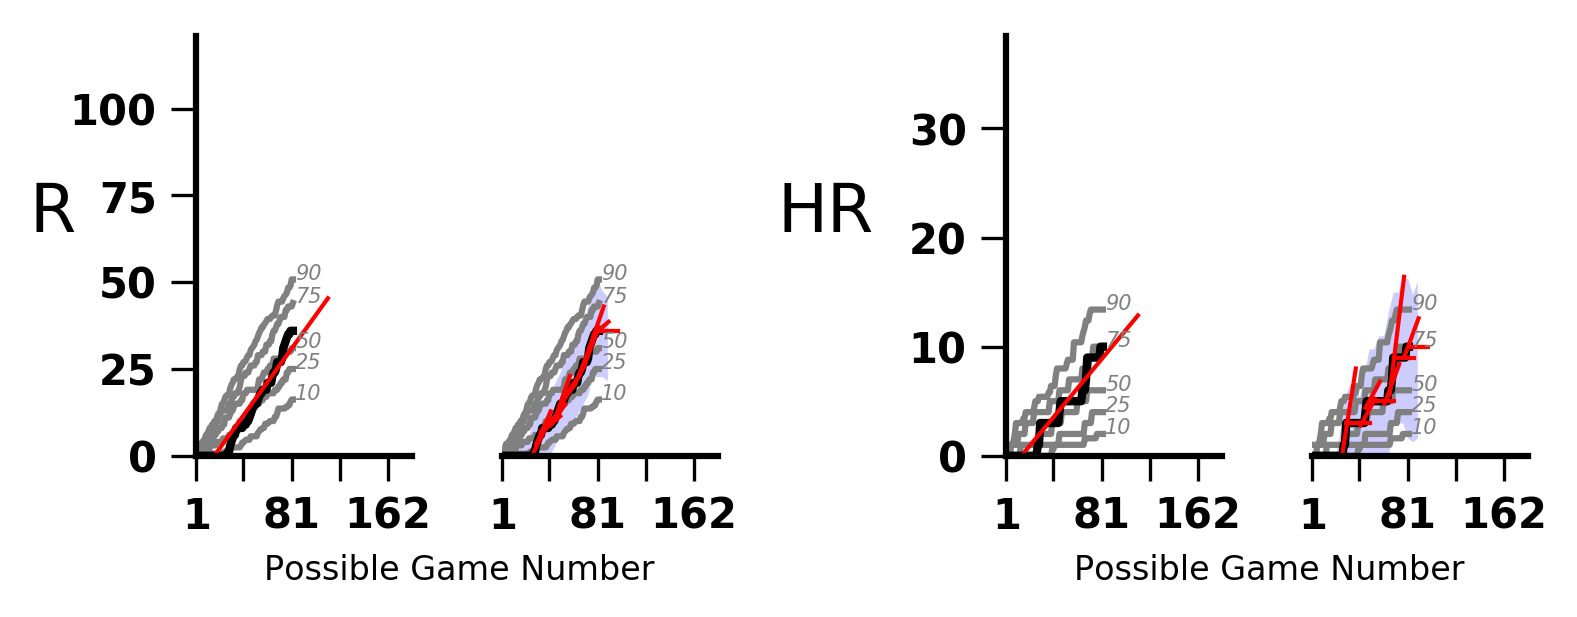

In [319]:

stat = 'R'
stat2 = 'HR'
pname = 'Tommy Pham'
des_pos = 'CF'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStatsD['POS'][plr] == des_pos)[0]) > 20:
    #if len(np.where(GStats['PA'][plr] > 0)[0]) > 50:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStatsD[stat][player])






#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(6,2),frameon = False)
ax2 = fig.add_axes([0.13,0.22,0.12,0.7])
ax3 = fig.add_axes([0.30,0.22,0.12,0.7])
ax1 = fig.add_axes([0.58,0.22,0.12,0.7])
ax4 = fig.add_axes([0.75,0.22,0.12,0.7])


maxval = 110.

maxday = 81

##############################################
#
# with linear regression
#

#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax2.plot(np.arange(1,len(GStatsD[stat][np.array(plist)[0]])+1,1)[0:maxday],\
            np.nanpercentile(PAlist,perc,axis=0)[0:maxday],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax2.text(maxday+2,np.nanpercentile(PAlist,perc,axis=0)[maxday],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax2.plot(np.arange(1,len(GStatsD[stat][pname])+1,1)[0:maxday],np.cumsum(GStatsD[stat][pname])[0:maxday],color='black')



ax2.set_xticks([1,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])


#ax2.set_yticks(())

ax2.set_ylabel(stat,size=16,rotation=0)
#ax2.set_title(pname,size=16,y=0.88)




mod_x,mod_points,mod_stats = fit_porcupine(GStatsD,stat,pname,window_size=maxday-2,resolution=maxday-2,extension=30)


for key in mod_x.keys():
    if np.max(mod_x[key]) < (maxday + 32):
        print(mod_stats[key]['slope'])
        ax2.plot(mod_x[key],mod_points[key],color='red',lw=1.)




_ = ax2.axis([1,180,0,1.1*maxval])
    
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)

#############
# porcupine chart
#
#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax3.plot(np.arange(1,len(GStatsD[stat][np.array(plist)[0]])+1,1)[0:maxday],\
            np.nanpercentile(PAlist,perc,axis=0)[0:maxday],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax3.text(maxday+2,np.nanpercentile(PAlist,perc,axis=0)[maxday],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax3.plot(np.arange(1,len(GStatsD[stat][pname])+1,1)[0:maxday],np.cumsum(GStatsD[stat][pname])[0:maxday],color='black')

mod_x,mod_points,mod_stats = fit_porcupine(GStatsD,stat,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < (maxday+20):
        #print(mod_stats[key]['slope'])
        ax3.plot(mod_x[key],mod_points[key],color='red',lw=1.)


# error realization
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [25.,75.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStatsD[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))

lessday = np.where(mod_x2 < (maxday+8))[0]


ax3.fill_between(mod_x2[lessday],abs_vals[lessday]-neg_error[lessday],abs_vals[lessday]+pos_error[lessday],color='blue',alpha=0.2,linewidth=0.)

  



ax3.set_xticks([1,40,80,120,160])
ax3.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax3.axis([1,180,0,1.1*maxval])
    
    
ax3.set_yticks(())
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.spines['bottom'].set_linewidth(1.5)

ax3.set_xlabel('Possible Game Number',size=8,x=-.2,ha='center')
ax4.set_xlabel('Possible Game Number',size=8,x=-.2,ha='center')




########################################
#second stat

maxval = 35.

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStatsD[stat2][player])





#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:



    ax1.plot(np.arange(1,len(GStatsD[stat2][np.array(plist)[0]])+1,1)[0:maxday],\
            np.nanpercentile(PAlist,perc,axis=0)[0:maxday],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax1.text(maxday+2,np.nanpercentile(PAlist,perc,axis=0)[maxday],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax1.plot(np.arange(1,len(GStatsD[stat2][pname])+1,1)[0:maxday],np.cumsum(GStatsD[stat2][pname])[0:maxday],color='black')



ax1.set_xticks([1,40,80,120,160])
ax1.set_xticklabels(['1','','81','','162'])


#ax2.set_yticks(())

ax1.set_ylabel(stat2,rotation=0,size=16,labelpad=20)
#ax2.set_title(pname,size=16,y=0.88)




mod_x,mod_points,mod_stats = fit_porcupine(GStatsD,stat2,pname,window_size=maxday-2,resolution=maxday-2,extension=30)


for key in mod_x.keys():
    if np.max(mod_x[key]) < maxday+32:
        print(mod_stats[key]['slope'])
        ax1.plot(mod_x[key],mod_points[key],color='red',lw=1.)




_ = ax1.axis([1,180,0,1.1*maxval])
    
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)





#############
# porcupine chart
#
#for perc in range(100,0,-10):
for perc in [90,75,50,25,10]:


    ax4.plot(np.arange(1,len(GStatsD[stat2][np.array(plist)[0]])+1,1)[0:maxday],\
            np.nanpercentile(PAlist,perc,axis=0)[0:maxday],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax4.text(maxday+2,np.nanpercentile(PAlist,perc,axis=0)[maxday],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax4.plot(np.arange(1,len(GStatsD[stat2][pname])+1,1)[0:maxday],np.cumsum(GStatsD[stat2][pname])[0:maxday],color='black')

mod_x,mod_points,mod_stats = fit_porcupine(GStatsD,stat2,pname,window_size=4,resolution=4,extension=8)


for key in mod_x.keys():
    if np.max(mod_x[key]) < (maxday+20):
        #print(mod_stats[key]['slope'])
        ax4.plot(mod_x[key],mod_points[key],color='red',lw=1.)


# error realization
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [25.,75.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStatsD[stat2][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
lessday = np.where(mod_x2 < (maxday+8))[0]
ax4.fill_between(mod_x2[lessday],abs_vals[lessday]-neg_error[lessday],abs_vals[lessday]+pos_error[lessday],color='blue',alpha=0.2,linewidth=0.)

  



ax4.set_xticks([1,40,80,120,160])
ax4.set_xticklabels(['1','','81','','162'])

#ax3.set_xlabel('Possible Game Number',size=8)
#ax3.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax4.axis([1,180,0,1.1*maxval])
    
    
ax4.set_yticks(())
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.spines['bottom'].set_linewidth(1.5)


#ax3.set_title(pname,size=10,x=0.7,y=0.85,zorder=10)




plt.savefig('/Users/mpetersen/Desktop/total_comp_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))






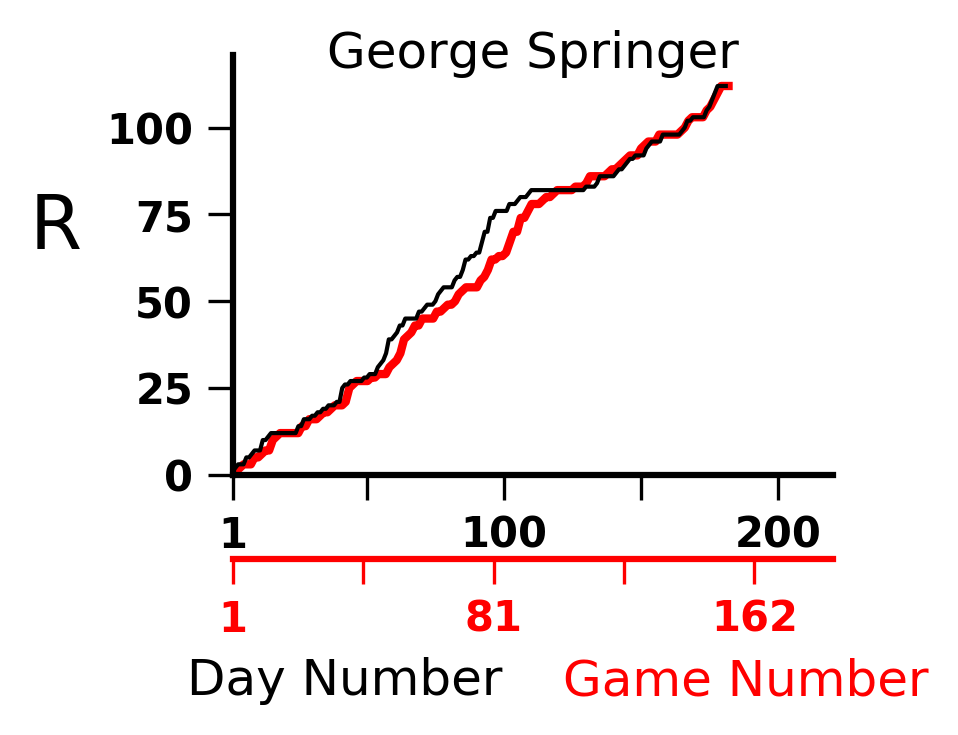

In [186]:

stat = 'R'
pname = 'George Springer'
des_pos = 'RF'


#print(len(np.array(DDStats[stat].keys())) )

fig = plt.figure(figsize=(10,2),frameon = False)
ax1 = fig.add_axes([0.20,0.22,0.2,0.7])

ax2 = ax1.twiny()


maxval = 110.

minday = 15
maxday = 200


    
ax1.plot(np.arange(1,len(DDStats[stat][pname])+1,1)[0:maxday]-19,np.cumsum(DDStats[stat][pname])[0:maxday],color='black',lw=1.)

nonzero = np.where(GStats['PA'][pname] > 0.)[0]
ax1.plot(np.linspace(1,maxday-18,len(nonzero)),np.cumsum(GStats[stat][pname][nonzero])[0:162],color='red',zorder=-9)




ax1.set_xticks([1.,50.,100.,150.,200])
ax1.set_xticklabels(['1','','100','','200'])

ax1.set_xlabel('Day Number',size=12,ha='right',x=0.45,labelpad=24)

_ = ax1.axis([1,220.,0,1.1*maxval])
    
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

ax1.set_ylabel(stat,size=18,rotation=0, labelpad=12)

ax1.set_title(pname,y=0.91,size=12)

ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.2))

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
for sp in ax2.spines.itervalues():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)
ax2.spines['bottom'].set_linewidth(1.5)

ax2.spines['bottom'].set_color('red')
#ax2.spines['bottom'].set_tick_color('red')
#ax2.spines['bottom'].set_label_color('red')




ax2.set_xlim(1,184)
ax2.set_xticks([0,40,80,120,160])
ax2.set_xticklabels(['1','','81','','162'])
ax2.set_xlabel("Game Number",size=12,x=0.55,ha='left')

ax2.xaxis.label.set_color('red')
ax2.tick_params(axis='x', colors='red')

plt.savefig('/Users/mpetersen/Desktop/total_CF_'+pname+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))






306


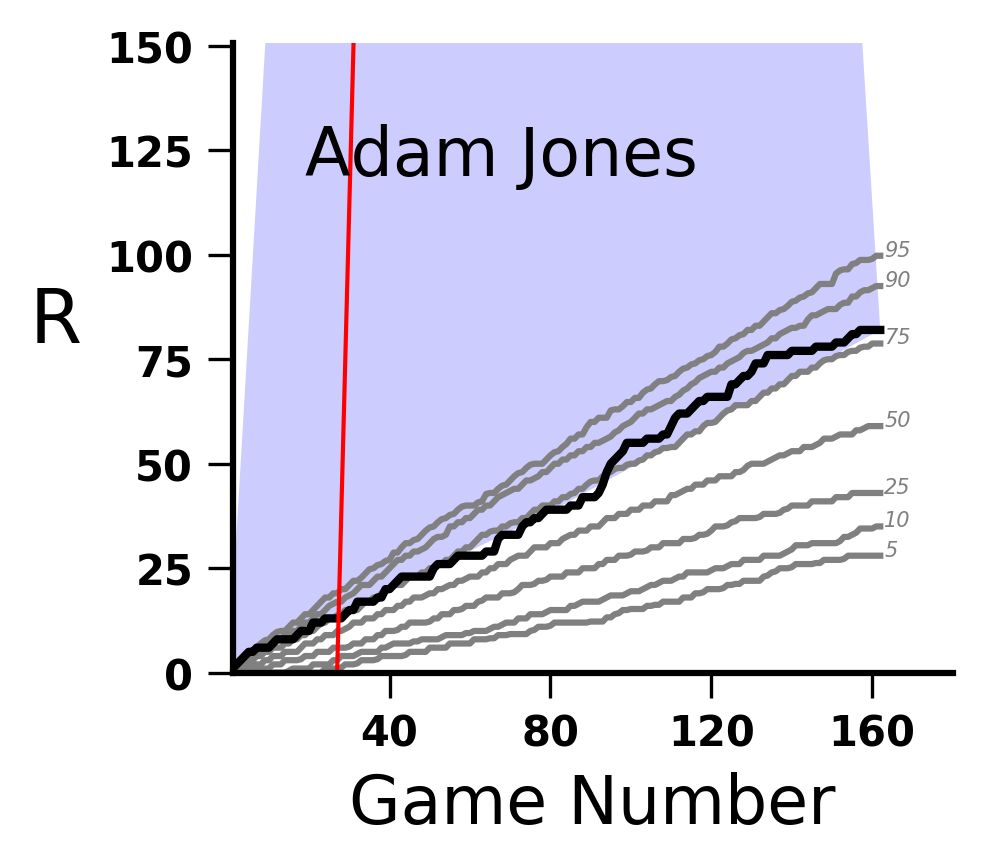

In [282]:


stat = 'R'
pname = 'Adam Jones'
des_pos = 'CF'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    #if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
    if len(np.where(GStats['PA'][plr] > 0)[0]) > 80:


        plist.append(plr)
        

PAlist = np.zeros([len(plist),max_day-zero_day])

print(len(plist))


#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure(figsize=(4,3),frameon = False)
ax = fig.add_axes([0.25,0.22,0.6,0.7])
#ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
#for perc in range(100,0,-10):
for perc in [95,90,75,50,25,10,5]:


    ax.plot(np.arange(1,len(GStats[stat][np.array(plist)[0]])+1,1)[0:162],\
            np.nanpercentile(PAlist,perc,axis=0)[0:162],color='gray',lw=1.5)#cm.gnuplot(float(perc/100.),1.))
    
    ax.text(163,np.nanpercentile(PAlist,perc,axis=0)[162],perc,color='gray',size=5,weight='light',style='italic')

    
    
ax.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

from sklearn import linear_model


import random
    

for key in mod_x.keys():
    if np.max(mod_x[key]) < 162:
        ax.plot(mod_x[key],mod_points[key],color='red',lw=1.)

    
mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

err_range = [33.,66.]
pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),err_range[0],axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),err_range[1],axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
ax.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

  
ax.set_ylabel(stat,size=18,rotation=0, labelpad=12)


ax.set_xticks([40,80,120,160])
ax.set_xlabel('Game Number',size=16)
ax.set_title(pname,size=16, x=.1, y=.75, ha='left')

_ = ax.axis([1,180,0,1.1*np.max(np.nanpercentile(PAlist,100,axis=0))])
    
#cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
#cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
#cb1.set_label('Percentile',size=18)

#fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)


plt.savefig('/Users/mpetersen/Desktop/'+pname+'_'+stat+'.png',bbox_inches='tight',facecolor='w',dpi=300)
#print(np.where(PAlist[:,150] >= 0.))


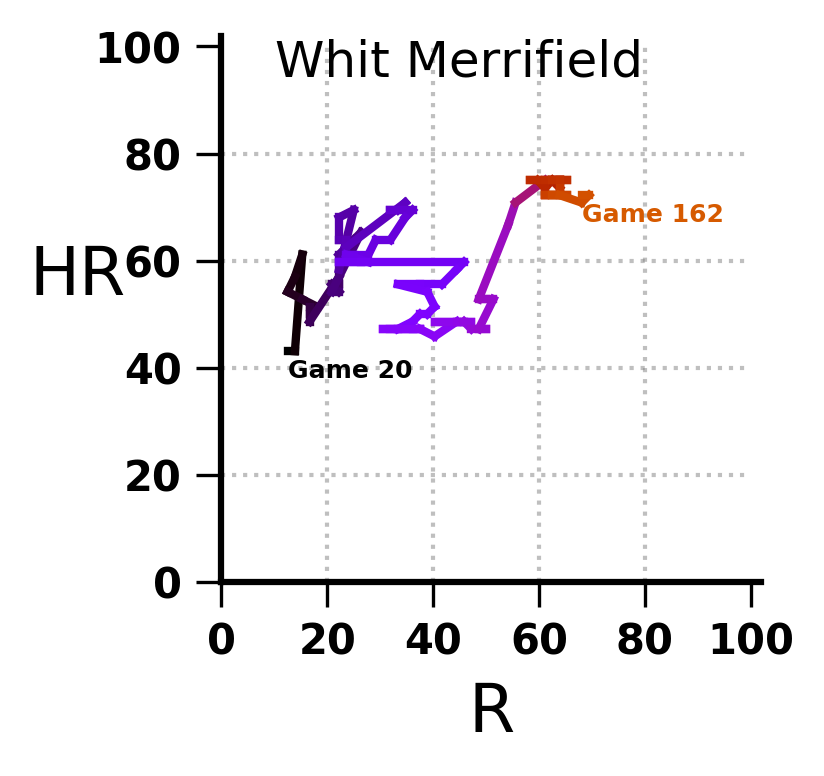

In [305]:


stat1 = 'R'
stat2 = 'HR'

pname = 'Whit Merrifield'
des_pos = '2B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
            plist.append(plr)


S1 = np.zeros([len(plist),max_day-zero_day])
S2 = np.zeros([len(plist),max_day-zero_day])


#print(plist)


#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    S1[indx] = np.cumsum(GStats[stat1][player])
    S2[indx] = np.cumsum(GStats[stat2][player])

C1 = np.cumsum(GStats[stat1][pname])[0:162]
C2 = np.cumsum(GStats[stat2][pname])[0:162]

L1 = np.zeros(162)
L2 = np.zeros(162)



from scipy import stats

for game in range(0,162):
    
    L1[game] = stats.percentileofscore(S1[:,game], C1[game], 'rank')
    L2[game] = stats.percentileofscore(S2[:,game], C2[game], 'rank')




fig = plt.figure(figsize=(3,2.6),frameon = False)
ax = fig.add_axes([0.25,0.22,0.6,0.7])
#ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

for game in range(20,161):
    ax.plot(L1[game:game+2],L2[game:game+2],color=cm.gnuplot((game-20.)/200.,1.))

    
ax.text(L1[20],L2[20] - 5.,'Game 20',color=cm.gnuplot((20.-20.)/200.,1.),size=6)
ax.text(L1[161],L2[161] - 5.,'Game 162',color=cm.gnuplot((161.-20.)/200.,1.),size=6)



    

for perc in [20,40,60,80]:
    ax.plot([0,100],[perc,perc],color='gray',lw=1.,alpha=0.5,zorder=-9,linestyle='dotted')
    ax.plot([perc,perc],[0,100],color='gray',lw=1.,alpha=0.5,zorder=-9,linestyle='dotted')

   
ax.set_xlabel(stat1,size=16)

ax.set_xticks([0.,20.,40.,60.,80.,100.])

ax.set_ylabel(stat2,size=16,rotation=0.)

_ = ax.axis([0.,102.,0.,102.])


ax.set_title(pname,size=12, x=.1, y=.88, ha='left')
    
#cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
#cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
#cb1.set_label('Percentile',size=18)

#fig.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)


plt.savefig('/Users/mpetersen/Desktop/'+pname+'_'+stat1+'_'+stat2+'.png',bbox_inches='tight',facecolor='w',dpi=300)



In [249]:
for i in range(0,len(L1)):
    print(i,L1[i],L2[i])

0 30.5555555556 44.4444444444
1 22.2222222222 40.2777777778
2 18.0555555556 38.8888888889
3 16.6666666667 37.5
4 13.8888888889 37.5
5 13.8888888889 37.5
6 12.5 33.3333333333
7 11.1111111111 30.5555555556
8 9.72222222222 30.5555555556
9 9.72222222222 29.1666666667
10 9.72222222222 26.3888888889
11 9.72222222222 25.0
12 16.6666666667 55.5555555556
13 15.2777777778 54.1666666667
14 15.2777777778 54.1666666667
15 13.8888888889 51.3888888889
16 12.5 50.0
17 12.5 47.2222222222
18 13.8888888889 44.4444444444
19 12.5 44.4444444444
20 12.5 43.0555555556
21 13.8888888889 43.0555555556
22 15.2777777778 61.1111111111
23 13.8888888889 56.9444444444
24 12.5 54.1666666667
25 15.2777777778 52.7777777778
26 15.2777777778 52.7777777778
27 18.0555555556 51.3888888889
28 16.6666666667 51.3888888889
29 16.6666666667 51.3888888889
30 16.6666666667 50.0
31 16.6666666667 48.6111111111
32 16.6666666667 48.6111111111
33 22.2222222222 56.9444444444
34 22.2222222222 55.5555555556
35 20.8333333333 55.5555555556
36

In [ ]:

#confidence_lo = np.zeros(len(mod_x2))
#confidence_hi = np.zeros(len(mod_x2))

mod_x2,mod_points2 = make_realization(mod_x,mod_points,nreal=100)

plt.plot(np.arange(1,len(GStats[stat][pname])+1,1)[0:162],np.cumsum(GStats[stat][pname])[0:162],color='black')

pos_error = np.percentile(np.cumsum(mod_points2,axis=1),50.0,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),16.7,axis=0)

neg_error = np.percentile(np.cumsum(mod_points2,axis=1),83.7,axis=0) - np.percentile(np.cumsum(mod_points2,axis=1),50.,axis=0)

abs_vals = np.cumsum(GStats[stat][pname])[mod_x2]

#print(np.percentile(np.cumsum(mod_points2,axis=0),20,axis=0))
plt.fill_between(mod_x2,abs_vals-neg_error,abs_vals+pos_error,color='blue',alpha=0.2,linewidth=0.)

plt.fill_between(mod_x2,np.percentile(np.cumsum(mod_points2,axis=1),33.3,axis=0),np.percentile(np.cumsum(mod_points2,axis=1),66.6,axis=0),color='red',alpha=0.2,linewidth=0.)


  

In [ ]:
    #ax.plot(np.array([np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day],np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day+window_size]]),\
    #       np.array([lm.predict(np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day]),lm.predict(np.arange(1,len(GStats[stat]['Jose Altuve'])+1,1)[day+window_size])]),\
    #       color='gray')
    
    

In [ ]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'BB'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,140.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





In [ ]:

fig = plt.figure(figsize=(6,2))

for indx1,des_pos in enumerate(np.array(['C','1B','2B','3B','SS','CF','RF','LF'])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(DDStats['POS'].keys()):
        
        try:
            if len(np.where(DDStats['POS'][plr] == des_pos)[0]) > 50:
                plist.append(plr)
        except:
            pass


    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'HR'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    ax.set_title(des_pos,size=18)

    ax.axis([0.0,250.,0.,50.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)






In [ ]:
AgeDict = np.genfromtxt('data/teamdict.dat',\
            dtype=[('team','S8'),('player','S20'),('age','i4')],delimiter='|')

print(AgeDict['age'][np.where(AgeDict['player']=='Joey Votto')][0])

In [ ]:

fig = plt.figure(figsize=(6,2))

for indx1,des_age in enumerate(np.array([25.,26.,27.,28.,29.,30.,31.,32.])):
    
    ax = fig.add_axes([0.12+(indx1*(0.75-.12)/7.),0.22,(0.75-.12)/7.,0.7])


    plist = []

    for indx,plr in enumerate(AgeDict['age']):
        
        try:
            if AgeDict['age'][indx] == des_age:
                if AgeDict['player'][indx] in DDStats['R'].keys():
                    if len(np.where(DDStats['PA'][AgeDict['player'][indx]] > 0.)[0]) > 50.:
                        plist.append(AgeDict['player'][indx])
        except:
            pass


    #print(len(plist),plist[0],plist[1])
    PAlist = np.zeros([len(plist),max_day-zero_day])



    stat = 'H'
    #print(len(np.array(DDStats[stat].keys())) )

    #for indx,player in enumerate(DDStats[stat].keys()):
    for indx,player in enumerate(np.array(plist)):

        PAlist[indx] = np.cumsum(DDStats[stat][player])






    for perc in range(100,0,-10):
        ax.plot(np.percentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))


    #ax.plot(np.cumsum(DDStats[stat]['Jose Altuve']),color='black')


    if indx1==0: 
        ax.set_ylabel(stat,size=18)
    else:
        ax.set_yticklabels(())
        
    if indx1==3: ax.set_xlabel('Gameday Number',size=18)
    
    #ax.set_title(len(plist),size=18)
    ax.set_title(int(des_age),size=18)

    ax.axis([0.0,250.,0.,220.])
    

ax2 = fig.add_axes([0.90,0.22,0.01,0.7])


cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)







In [ ]:

print(GGDict['reds'])

In [ ]:

#
# read in team game data
#
f = open('data/teamgames.dat','r')

GGDict = {}
for line in f:
    q = [d for d in line.split()]
    GGDict[q[0]] = np.array(q[1:]).astype('int')
    
f.close()


#
# and helper items for translating
#


team_translate = {'angels':'LAA','astros':'HOU','athletics':'OAK',\
                  'bluejays':'TOR','braves':'ATL','brewers':'MIL',\
                  'cardinals':'STL','cubs':'CHC','diamondbacks':'ARI',\
                  'dodgers':'LAD','giants':'SFG','indians':'CLE',\
                  'mariners':'SEA','marlins':'MIA','mets':'NYM',\
                  'nationals':'WSN','orioles':'BAL','padres':'SDP',\
                  'phillies':'PHI','pirates':'PIT','rangers':'TEX',\
                  'rays':'TBR','reds':'CIN','redsox':'BOS',\
                  'rockies':'COL','royals':'KCR','tigers':'DET',\
                  'twins':'MIN','whitesox':'CHW','yankees':'NYY'}


def translate_team(team_translate,inteam):
    
    try:
    
        return np.array(team_translate.keys())[np.where(inteam==np.array(team_translate.values()))[0]][0]

    except:
        
        return ''

    
def generate_schedule(GGDict,team,min_day=75,max_day=300):
    
    schedule = []
    
    for i in range(min_day,max_day):
        
        if i in GGDict[team]:
            schedule.append(team)
            
        else:
            schedule.append('')

    return np.array(schedule)





In [ ]:
jvotto = np.array([translate_team(team_translate,q) for q in DDStats['TEAM']['Jose Altuve']])

print([np.unique(jvotto)[q] for q in range(0,len(np.unique(jvotto)))][1])

In [ ]:
gplayed = []

for player in DDStats['TEAM'].keys():
    
    #print(player)
    
    pp = np.array([translate_team(team_translate,q) for q in DDStats['TEAM'][player]])

    #print([np.unique(player)[q] for q in range(0,len(np.unique(player)))][1])
    teamsch = generate_schedule(GGDict,[np.unique(pp)[q] for q in range(0,len(np.unique(pp)))][1])

    #print('{0:24s}{1:3d}'.format(player,162-len(np.where(np.array([(pp[q]==teamsch[q]) for q in range(0,len(teamsch))] )==False)[0])))


    gplayed.append(162-len(np.where(np.array([(pp[q]==teamsch[q]) for q in range(0,len(teamsch))] )==False)[0]))


gplayed = np.array(gplayed)

#for i in range(0,len(jvotto)):
#    if redssch[i] != '':
#        print(redssch[i],jvotto[i])

#print(GGDict['rockies']-75)

In [ ]:
cts,bins = np.histogram(gplayed, bins=np.arange(0.5,163.5,1.))

plt.plot(np.arange(1,163,1),cts,linestyle='steps-mid',color='black')

In [ ]:
plt.plot(np.arange(1,163,1),np.cumsum(cts),linestyle='steps-mid',color='black')

In [ ]:
# reorganize with game numbers(e.g. including days the team played and they sat)

zero_day = 75
max_day = 300

GStats = {}

for key1 in np.array(DDStats.keys()):
    
    GStats[key1] = {}
    
    for key2 in np.array(DDStats[key1].keys()):
        
        if key1 in ['OPP','POS','TEAM']:
            GStats[key1][key2] = np.zeros(max_day-zero_day+50,dtype='S5')
            
        else:
            GStats[key1][key2] = np.zeros(max_day-zero_day+50) + np.nan
            
        gnum = 0
        for indx,val in enumerate(DDStats[key1][key2]):
            
            #print(indx,val.strip('@'))
            
            if DDStats['POS'][key2][indx] != '':
                GStats[key1][key2][gnum] = DDStats[key1][key2][indx]
                gnum += 1
                
            else:
                # identify which team (forward-looking)
                indx1 = 0
                while (DDStats['TEAM'][key2][indx+indx1] == '') & (indx1 < 3) & (indx < 210):
                    #print(indx,key2)
                    indx1 += 1
                    
                if indx1 == 10:
                    pass
                    #print('last game')
                    
                which_team = (DDStats['TEAM'][key2][indx+indx1]).strip('@')
                
                # check if team had a game
                if which_team != '':
                    if (indx+zero_day) in GGDict[translate_team(team_translate,which_team)]:
                        #print('off day')
                        GStats[key1][key2][gnum] = GStats[key1][key2][gnum-1]
                        gnum += 1
                
        #print(key2,gnum)


In [ ]:
GStats['R']['Giovanny Urshela']

In [ ]:

buff = 50
des_pos = '2B'
plist = []

for indx,plr in enumerate(DDStats['POS'].keys()):
    if len(np.where(GStats['POS'][plr] == des_pos)[0]) > 50:
        plist.append(plr)
        

        
print(plist)
PAlist = np.zeros([len(plist),max_day-zero_day+buff])



stat = 'R'
#print(len(np.array(DDStats[stat].keys())) )

#for indx,player in enumerate(DDStats[stat].keys()):
for indx,player in enumerate(np.array(plist)):
    
    PAlist[indx] = np.cumsum(GStats[stat][player])


fig = plt.figure()
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,0,-10):
    ax.plot(np.nanpercentile(PAlist,perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

ax.plot(np.cumsum(GStats[stat]['Jose Altuve']),color='black')

    
ax.set_ylabel(stat,size=18)
ax.set_xlabel('GAME Number',size=18)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)


print(np.where(PAlist[:,150] >= 0.))



In [121]:
from mpl_toolkits.mplot3d import Axes3D


#Player,Clusters,R.Slope,BB.Slope,H.Slope,R.R^2,BB.R^2,H.R^2

Clusters = np.genfromtxt('/Users/mpetersen/Downloads/GC2_ClusteringTable_BB_H_R.csv',\
                        names=['Player','Cluster','r_s','bb_s','h_s','r_r2','bb_r2','h_r2'],\
                         skip_header=1,delimiter=',')



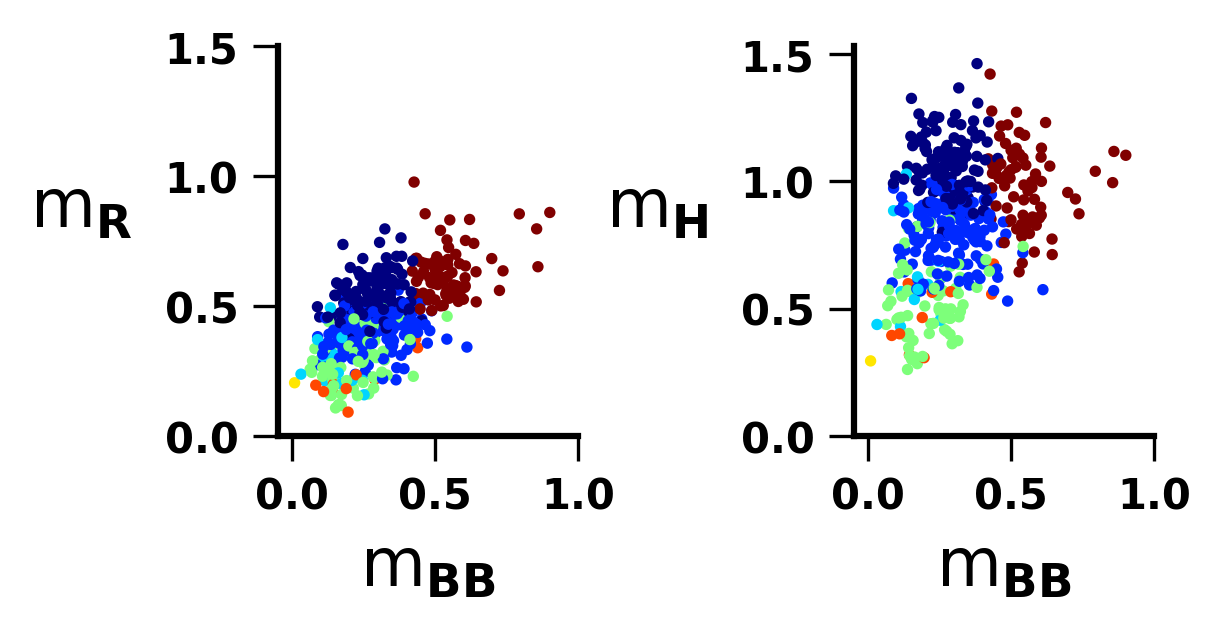

In [312]:
%matplotlib inline

fig = plt.figure(figsize=(4,2.6),frameon = False)
ax1 = fig.add_axes([0.20,0.22,0.25,0.5])
ax2 = fig.add_axes([0.68,0.22,0.25,0.5])

ax1.scatter(Clusters['bb_s'],Clusters['r_s'],\
           s=3.,color=cm.jet(Clusters['Cluster']/6.,1.))


ax2.scatter(Clusters['bb_s'],Clusters['h_s'],\
           s=3.,color=cm.jet(Clusters['Cluster']/6.,1.))


ax1.set_xlabel('m$_{\\rm BB}$',size=16)
ax1.set_ylabel('m$_{\\rm R}$',size=16,rotation=0,labelpad=20)

ax2.set_xlabel('m$_{\\rm BB}$',size=16)
ax2.set_ylabel('m$_{\\rm H}$',size=16,rotation=0,labelpad=20)


ax1.set_xticks([0.,.5,1.])
ax2.set_xticks([0.,.5,1.])

ax1.set_yticks([0.,.5,1.0,1.5])
ax2.set_yticks([0.,.5,1.0,1.5])


#ax1.set_ylabel(stat2,size=16,rotation=0.)

#_ = ax.axis([0.,102.,0.,102.])


#ax.set_title(pname,size=12, x=.1, y=.88, ha='left')
    
#cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
#cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
#cb1.set_label('Percentile',size=18)

#fig.tight_layout()

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)




plt.savefig('/Users/mpetersen/Desktop/clustering1.png',bbox_inches='tight',facecolor='w',dpi=300)





<IPython.core.display.Javascript object>


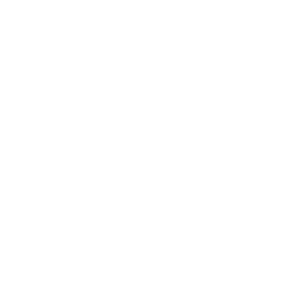

<IPython.core.display.Javascript object>


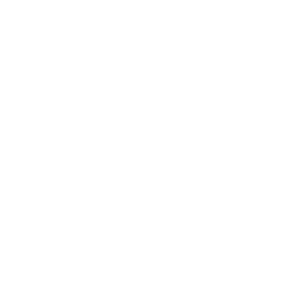

In [243]:
%matplotlib notebook

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_axes([0.3,0.3,0.9,0.9], projection='3d')




ax.scatter(Clusters['r_s'],Clusters['bb_s'],Clusters['h_s'],\
           s=4.,color=cm.jet(Clusters['Cluster']/6.,1.))


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.xaxis._axinfo["grid"]['color'] 

ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

ax.set_xlabel("m$_{\\rm R}$",size=16,rotation=0,labelpad=15)
ax.set_ylabel("m$_{\\rm BB}$",size=16,labelpad=15)
ax.set_zlabel("m$_{\\rm H}$",size=16,labelpad=15)

ax.set_xlabel("m$_{\\rm R}$",size=16,rotation=0)
ax.set_ylabel("m$_{\\rm BB}$",size=16,rotation=0)
ax.set_zlabel("m$_{\\rm H}$",size=16,rotation=0)





ax.set_xlim(0.,1.)
ax.set_ylim(0.,1.)
ax.set_zlim(0.,1.5)


ax.view_init(30., 30.)

#ax.set_position([0.3,0.3,0.3,0.3])

#ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
#ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)


#plt.subplots_adjust(bottom=0.3,left=0.3)
plt.savefig('/Users/mpetersen/Desktop/rot2.png')

#